![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


1. **Which hour has the highest frequency of crimes?**
- Store as an integer variable called `peak_crime_hour`.

In [2]:
crimes['hour'] = crimes['TIME OCC'].str[:2]
crimes['minute'] = crimes['TIME OCC'].str[2:]

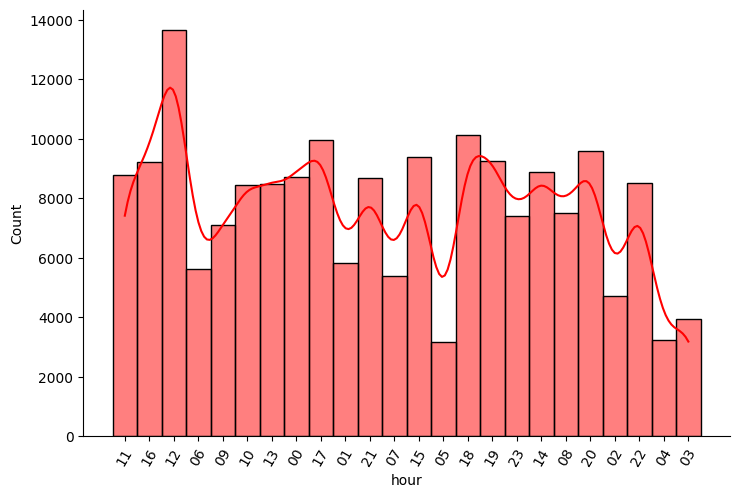

In [3]:
# plot the frequency of crimes by hour
sns.displot(crimes['hour'], kde=True, aspect=1.5, color='red')
plt.xticks(ticks=range(0, 24, 1), rotation=60)
plt.show()

In [4]:
# convert `hours` and `minutes` to integer
crimes['hour'] = crimes['hour'].astype(int)
crimes['minute'] = crimes['minute'].astype(int)

In [5]:
# most frequent hour of crime
peak_crime_hour = crimes['hour'].mode()[0]  # or crimes['hour'].value_counts().index[0]
peak_crime_hour

np.int64(12)

2. **Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?**
- Save as a string variable called `peak_night_crime_location`.

In [6]:
late_night_crimes = crimes[(crimes['hour'] >= 22) | (crimes['hour'] < 4)]


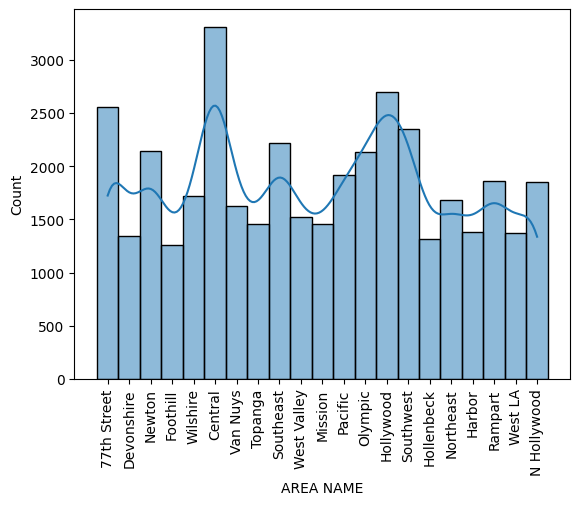

In [7]:
# plot the frequency of crimes by hour and area
sns.histplot(data=late_night_crimes, x='AREA NAME', kde=True)
plt.xticks(rotation=90)
plt.show()

In [8]:
# get the late night crimes area with the most crimes
peak_night_crime_location = late_night_crimes['AREA NAME'].mode()[0]
peak_night_crime_location

'Central'

3. **Identify the number of crimes committed against victims of different age groups.** Save as a pandas Series called `victim_ages`, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

In [ ]:
# define labels for `victim_ages` groups
age_labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

# define bins for `victim_ages` groups
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]  # np.inf is a special value that represents infinity

# create `victim_ages` Series
victim_ages = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# print `victim_ages` Series
print(victim_ages.value_counts())


Vict Age
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64


<Axes: title={'center': 'Victim Ages'}, xlabel='Age Group', ylabel='Number of Crimes'>

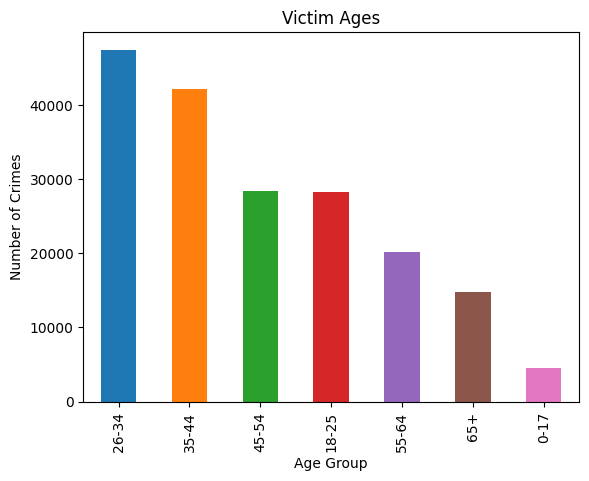

In [10]:
# plot victim_ages Series
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
              '#9467bd', '#8c564b', '#e377c2']
victim_ages.value_counts().plot(kind='bar', title='Victim Ages', xlabel='Age Group', ylabel='Number of Crimes', color=bar_colors)

In [11]:
crimes['victim_ages'] = victim_ages
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,hour,minute,victim_ages
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,10,26-34
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,20,55-64
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,0,26-34
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6,35,35-44
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9,0,65+
